In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import pickle


In [287]:
data =pd.read_csv("ElecDeviceRatingPrediction.csv")

In [288]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,45990,3 stars,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,No warranty,No,No,106167,4 stars,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,4 stars,42,4
4,HP,AMD,Ryzen 7,Not Available,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,3 stars,23,6


In [289]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,45990,3 stars,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,No warranty,No,No,106167,4 stars,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,4 stars,42,4
4,HP,AMD,Ryzen 7,Not Available,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,3 stars,23,6


## preprocessing

### show duplicate

In [290]:
data.duplicated().value_counts()

False    706
True      17
dtype: int64

In [291]:
data= data.drop_duplicates()

In [292]:
data.duplicated().value_counts()

False    706
dtype: int64

### split data

In [293]:
X=data.drop('rating',axis=1)
y=data['rating']

In [294]:
X.describe()

,Price,Number of Ratings,Number of Reviews
count,706.000000,706.000000,706.000000
mean,76935.688385,291.058074,35.475921
std,45769.690936,940.407679,113.004927
min,16990.000000,0.000000,0.000000
25%,45600.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89918.000000,154.500000,19.750000
max,441990.000000,15279.000000,1947.000000


In [295]:
y.describe()

count         706
unique          5
top       4 stars
freq          381
Name: rating, dtype: object

### show null

In [296]:
print(X.isnull().sum())

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
Number of Ratings    0
Number of Reviews    0
dtype: int64


In [297]:
print("nulls of rating  = %d"%y.isnull().sum())

nulls of rating  = 0


### Inconsistent 

In [298]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 722
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              706 non-null    object
 1   processor_brand    706 non-null    object
 2   processor_name     706 non-null    object
 3   processor_gnrtn    706 non-null    object
 4   ram_gb             706 non-null    object
 5   ram_type           706 non-null    object
 6   ssd                706 non-null    object
 7   hdd                706 non-null    object
 8   os                 706 non-null    object
 9   graphic_card_gb    706 non-null    object
 10  weight             706 non-null    object
 11  warranty           706 non-null    object
 12  Touchscreen        706 non-null    object
 13  msoffice           706 non-null    object
 14  Price              706 non-null    int64 
 15  Number of Ratings  706 non-null    int64 
 16  Number of Reviews  706 non-null    int64 
dt

In [299]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 706 entries, 0 to 722
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
706 non-null    object
dtypes: object(1)
memory usage: 11.0+ KB


In [300]:
for i in X.columns:
    print('',i,'','\n',data[i].value_counts() ,'\n\n\n')

 brand  
 ASUS      216
Lenovo    131
DELL      126
HP        120
MSI        44
acer       43
APPLE      20
Avita       6
Name: brand, dtype: int64 



 processor_brand  
 Intel    525
AMD      164
M1        17
Name: processor_brand, dtype: int64 



 processor_name  
 Core i5         248
Core i3         141
Core i7          92
Ryzen 5          71
Ryzen 7          50
Celeron Dual     23
Ryzen 3          23
Ryzen 9          21
M1               17
Pentium Quad     12
Core i9           8
Name: processor_name, dtype: int64 



 processor_gnrtn  
 11th             286
Not Available    197
10th             178
8th               30
7th                6
9th                6
12th               2
4th                1
Name: processor_gnrtn, dtype: int64 



 ram_gb  
 8 GB     349
4 GB     198
16 GB    157
32 GB      2
Name: ram_gb, dtype: int64 



 ram_type  
 DDR4       605
LPDDR4X     50
LPDDR4      26
LPDDR3      12
DDR3         7
DDR5         6
Name: ram_type, dtype: int64 



 ssd  
 512 G

In [301]:
print('',i,'','\n',y.value_counts() ,'\n\n\n')

 Number of Reviews  
 4 stars    381
3 stars    304
5 stars     12
2 stars      7
1 star       2
Name: rating, dtype: int64 





In [302]:
mode_value = X["processor_gnrtn"].mode()[0]
X["processor_gnrtn"].replace("Not Available", mode_value, inplace=True)
X["warranty"].replace("No warranty", '0', inplace=True)
print('',"processor_gnrtn",'','\n',X["processor_gnrtn"].value_counts() ,'\n\n\n')

 processor_gnrtn  
 11th    483
10th    178
8th      30
7th       6
9th       6
12th      2
4th       1
Name: processor_gnrtn, dtype: int64 





### one hot encoded

In [303]:
X

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,11th,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,0,No,No,45990,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,0,No,No,106167,1881,241
2,ASUS,Intel,Celeron Dual,11th,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,0,No,No,22990,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,42,4
4,HP,AMD,Ryzen 7,11th,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,0,No,No,39998,10,1
719,HP,Intel,Core i3,11th,8 GB,DDR4,512 GB,0 GB,64-bit Windows,0 GB,ThinNlight,0,No,No,44990,0,0
720,Lenovo,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,64-bit Windows,0 GB,Casual,3 years,Yes,Yes,64990,48,12
721,MSI,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,8 GB,Casual,0,No,No,179990,24,5


In [304]:
columns_to_encode = [ "processor_brand" ,"processor_name", "ram_type", "os", "weight"]
encoded_df = pd.get_dummies(X[columns_to_encode])
encoded_df = encoded_df.astype(int)
data_encoded = pd.DataFrame(X.drop(columns=columns_to_encode))
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)
data_encoded.head()

,brand,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,warranty,Touchscreen,msoffice,Price,...,ram_type_LPDDR4,ram_type_LPDDR4X,os_32-bit DOS,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,ASUS,11th,4 GB,0 GB,512 GB,0 GB,0,No,No,45990,...,0,1,0,0,0,0,1,1,0,0
1,ASUS,10th,8 GB,0 GB,512 GB,4 GB,0,No,No,106167,...,1,0,1,0,0,0,0,1,0,0
2,ASUS,11th,4 GB,0 GB,512 GB,0 GB,0,No,No,22990,...,0,0,0,0,0,0,1,1,0,0
3,Lenovo,11th,4 GB,256 GB,0 GB,0 GB,1 year,No,Yes,44990,...,0,0,0,0,0,0,1,1,0,0
4,HP,11th,16 GB,512 GB,0 GB,2 GB,1 year,No,Yes,79990,...,0,0,0,0,0,0,1,1,0,0


In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 722
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              706 non-null    object
 1   processor_brand    706 non-null    object
 2   processor_name     706 non-null    object
 3   processor_gnrtn    706 non-null    object
 4   ram_gb             706 non-null    object
 5   ram_type           706 non-null    object
 6   ssd                706 non-null    object
 7   hdd                706 non-null    object
 8   os                 706 non-null    object
 9   graphic_card_gb    706 non-null    object
 10  weight             706 non-null    object
 11  warranty           706 non-null    object
 12  Touchscreen        706 non-null    object
 13  msoffice           706 non-null    object
 14  Price              706 non-null    int64 
 15  rating             706 non-null    object
 16  Number of Ratings  706 non-null    int64 
 1

In [306]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 722
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   brand                        706 non-null    object
 1   processor_gnrtn              706 non-null    object
 2   ram_gb                       706 non-null    object
 3   ssd                          706 non-null    object
 4   hdd                          706 non-null    object
 5   graphic_card_gb              706 non-null    object
 6   warranty                     706 non-null    object
 7   Touchscreen                  706 non-null    object
 8   msoffice                     706 non-null    object
 9   Price                        706 non-null    int64 
 10  Number of Ratings            706 non-null    int64 
 11  Number of Reviews            706 non-null    int64 
 12  processor_brand_AMD          706 non-null    int32 
 13  processor_brand_Intel        706 no

### label encoder

In [307]:
data_encoded

,brand,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,warranty,Touchscreen,msoffice,Price,...,ram_type_LPDDR4,ram_type_LPDDR4X,os_32-bit DOS,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,ASUS,11th,4 GB,0 GB,512 GB,0 GB,0,No,No,45990,...,0,1,0,0,0,0,1,1,0,0
1,ASUS,10th,8 GB,0 GB,512 GB,4 GB,0,No,No,106167,...,1,0,1,0,0,0,0,1,0,0
2,ASUS,11th,4 GB,0 GB,512 GB,0 GB,0,No,No,22990,...,0,0,0,0,0,0,1,1,0,0
3,Lenovo,11th,4 GB,256 GB,0 GB,0 GB,1 year,No,Yes,44990,...,0,0,0,0,0,0,1,1,0,0
4,HP,11th,16 GB,512 GB,0 GB,2 GB,1 year,No,Yes,79990,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,Lenovo,11th,4 GB,256 GB,0 GB,0 GB,0,No,No,39998,...,0,0,0,0,0,0,1,1,0,0
719,HP,11th,8 GB,512 GB,0 GB,0 GB,0,No,No,44990,...,0,0,0,0,0,0,1,0,0,1
720,Lenovo,11th,8 GB,512 GB,0 GB,0 GB,3 years,Yes,Yes,64990,...,0,0,0,0,0,0,1,1,0,0
721,MSI,10th,8 GB,0 GB,512 GB,8 GB,0,No,No,179990,...,1,0,1,0,0,0,0,1,0,0


In [308]:
cols_to_encode = ["msoffice", "Touchscreen", "brand"]
classes = []

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit LabelEncoder on training data for the specified columns
for col in cols_to_encode:
    label_encoder.fit(data_encoded[col])
    classes.append(label_encoder.classes_)
    data_encoded[col] = label_encoder.transform(data_encoded[col])


In [333]:
classes

[array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['APPLE', 'ASUS', 'Avita', 'DELL', 'HP', 'Lenovo', 'MSI', 'acer'],
       dtype=object)]

In [310]:
for i in data_encoded.columns:
    print('',i,'','\n',data_encoded[i].value_counts() ,'\n\n\n')

 brand  
 1    216
5    131
3    126
4    120
6     44
7     43
0     20
2      6
Name: brand, dtype: int64 



 processor_gnrtn  
 11th    483
10th    178
8th      30
7th       6
9th       6
12th      2
4th       1
Name: processor_gnrtn, dtype: int64 



 ram_gb  
 8 GB     349
4 GB     198
16 GB    157
32 GB      2
Name: ram_gb, dtype: int64 



 ssd  
 512 GB     351
256 GB     145
0 GB       112
1024 GB     92
128 GB       3
2048 GB      2
3072 GB      1
Name: ssd, dtype: int64 



 hdd  
 0 GB       525
1024 GB    142
512 GB      38
2048 GB      1
Name: hdd, dtype: int64 



 graphic_card_gb  
 0 GB    491
4 GB    113
2 GB     55
6 GB     34
8 GB     13
Name: graphic_card_gb, dtype: int64 



 warranty  
 1 year     431
0          242
2 years     20
3 years     13
Name: warranty, dtype: int64 



 Touchscreen  
 0    620
1     86
Name: Touchscreen, dtype: int64 



 msoffice  
 0    459
1    247
Name: msoffice, dtype: int64 



 Price  
 64990    14
79990    12
99990    11
59990  

### convert to int  

In [311]:
def remove_strings_keep_numbers(input_string):
    pattern = r'[a-zA-Z]+'
    result = re.sub(pattern, '', input_string)
    return result

In [312]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 722
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   brand                        706 non-null    int32 
 1   processor_gnrtn              706 non-null    object
 2   ram_gb                       706 non-null    object
 3   ssd                          706 non-null    object
 4   hdd                          706 non-null    object
 5   graphic_card_gb              706 non-null    object
 6   warranty                     706 non-null    object
 7   Touchscreen                  706 non-null    int32 
 8   msoffice                     706 non-null    int32 
 9   Price                        706 non-null    int64 
 10  Number of Ratings            706 non-null    int64 
 11  Number of Reviews            706 non-null    int64 
 12  processor_brand_AMD          706 non-null    int32 
 13  processor_brand_Intel        706 no

In [313]:
data_encoded["processor_gnrtn"]=data_encoded["processor_gnrtn"].apply(remove_strings_keep_numbers)
data_encoded["ram_gb"]=data_encoded["ram_gb"].apply(remove_strings_keep_numbers)
data_encoded["ssd"]=data_encoded["ssd"].apply(remove_strings_keep_numbers)
data_encoded["hdd"]=data_encoded["hdd"].apply(remove_strings_keep_numbers)
data_encoded["graphic_card_gb"]=data_encoded["graphic_card_gb"].apply(remove_strings_keep_numbers)
data_encoded["warranty"]=data_encoded["warranty"].apply(remove_strings_keep_numbers)

columns_to_convert = ['processor_gnrtn', 'ram_gb','ssd','hdd','graphic_card_gb','warranty']
data_encoded[columns_to_convert] = data_encoded[columns_to_convert].astype(int)

y=y.apply(remove_strings_keep_numbers)
y=y.astype(int)

### boxplot 

#### boxplot for price

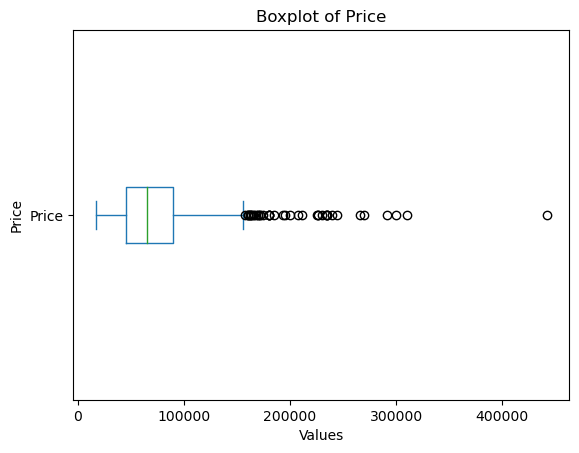

In [314]:
data['Price'].plot(kind='box' , vert  =False)
plt.title('Boxplot of Price')
plt.xlabel('Values')
plt.ylabel('Price')
plt.show()

#### box plot for number of rating

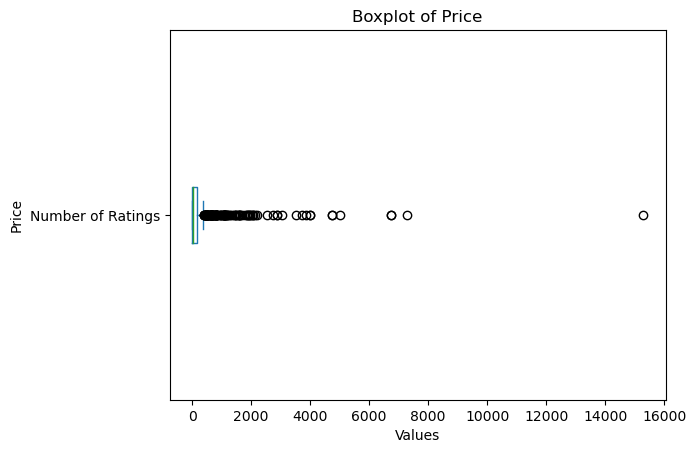

In [315]:
data['Number of Ratings'].plot(kind='box' , vert  =False)
plt.title('Boxplot of Price')
plt.xlabel('Values')
plt.ylabel('Price')
plt.show()

#### box plot of num of reviews

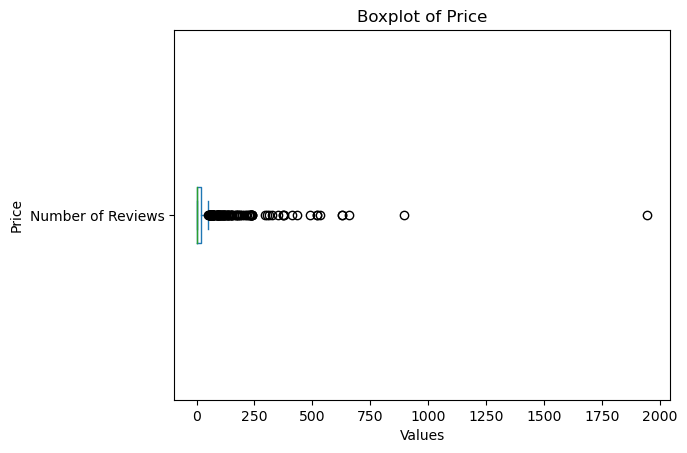

In [316]:
data['Number of Reviews'].plot(kind='box' , vert  =False)
plt.title('Boxplot of Price')
plt.xlabel('Values')
plt.ylabel('Price')
plt.show()

### apply transform to remove outlier 

In [317]:
transformed_data = np.log(data_encoded[["Price",'Number of Reviews',"Number of Ratings"]]+1e-3)
transformed_data[np.isinf(transformed_data)] = 0
data_encoded[["Price",'Number of Reviews',"Number of Ratings"]] = pd.DataFrame(transformed_data)

### visualization

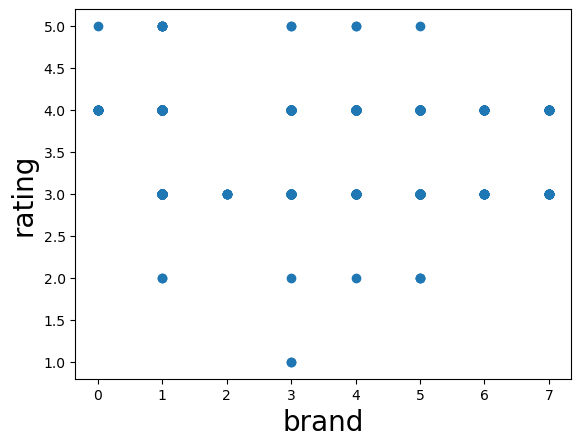

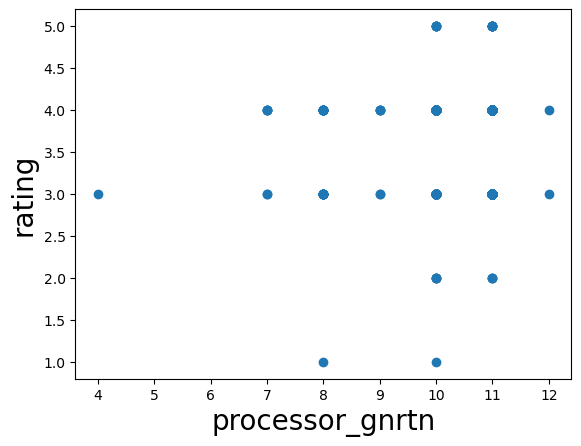

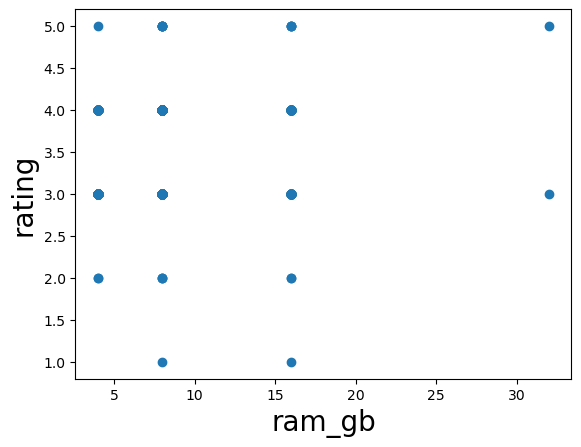

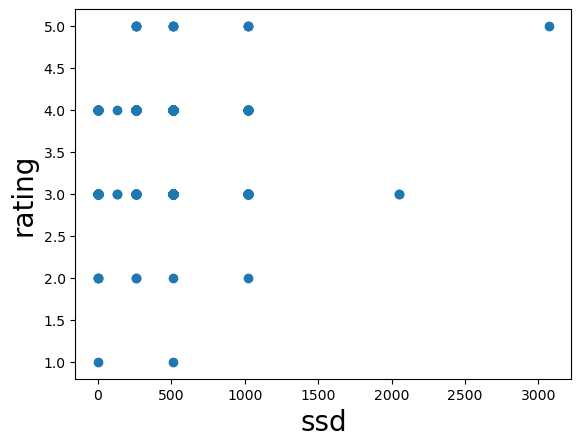

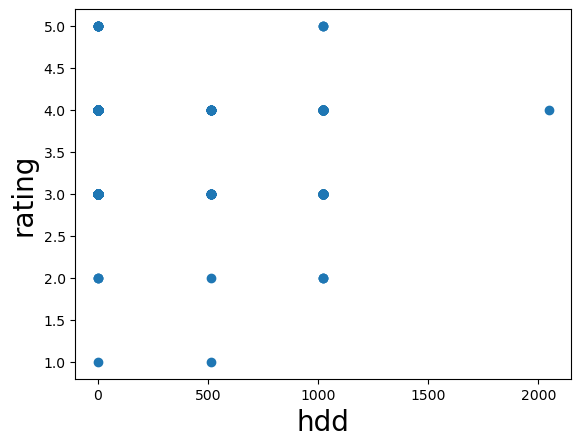

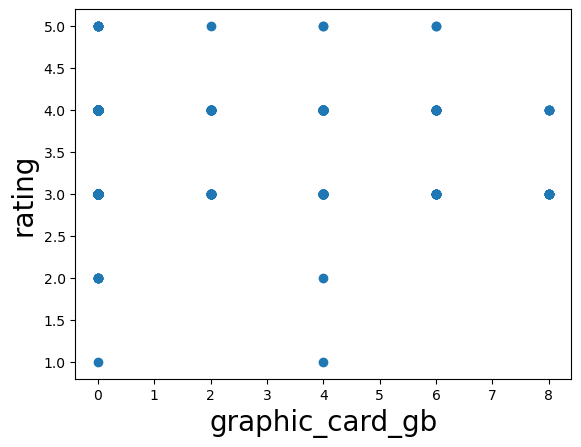

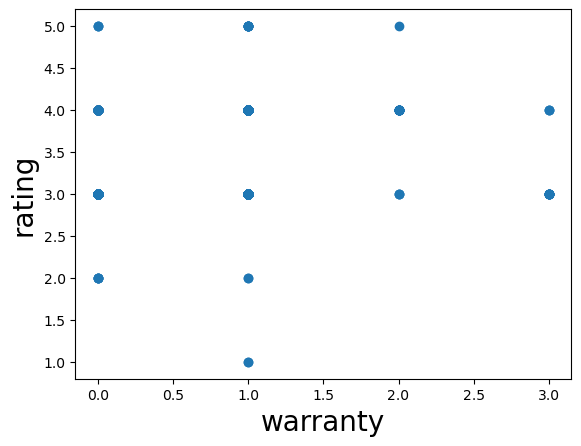

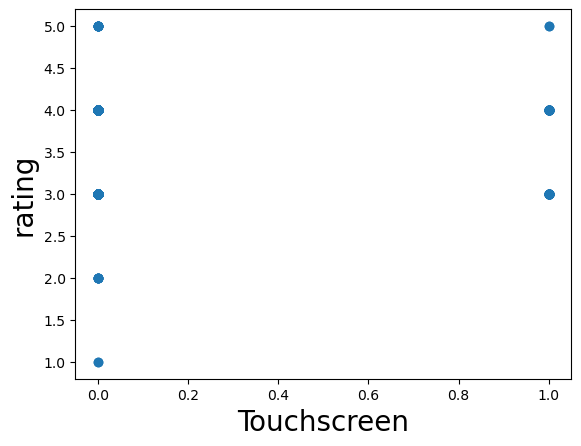

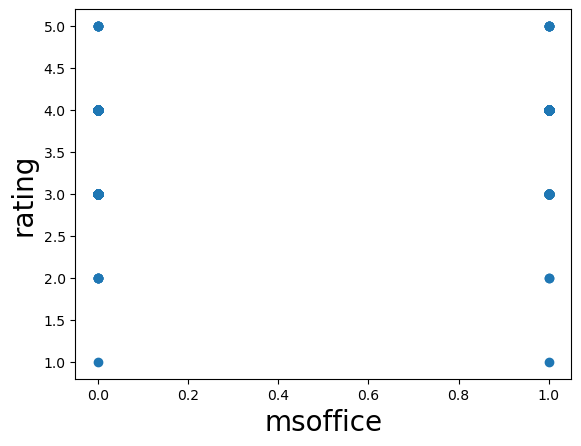

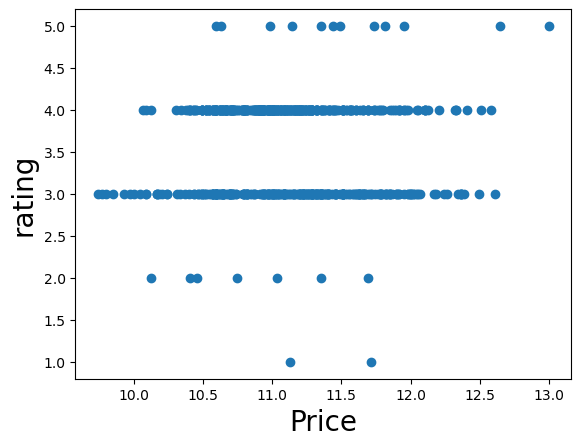

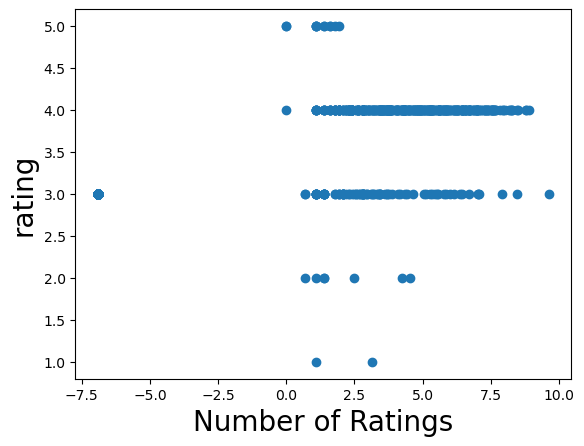

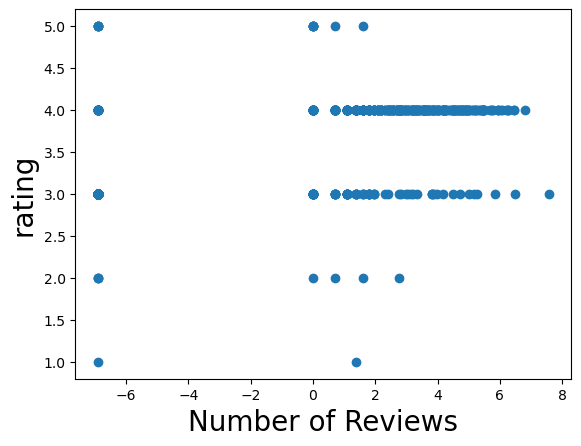

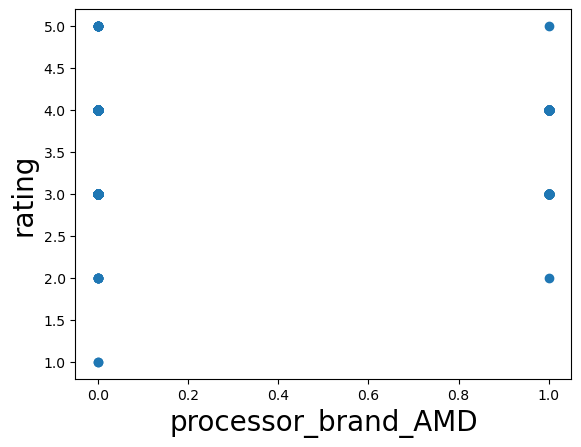

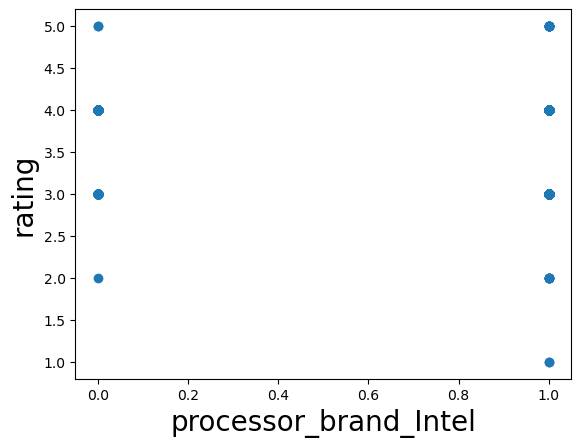

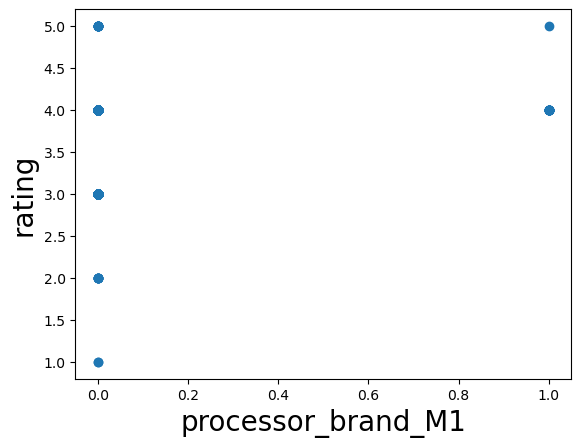

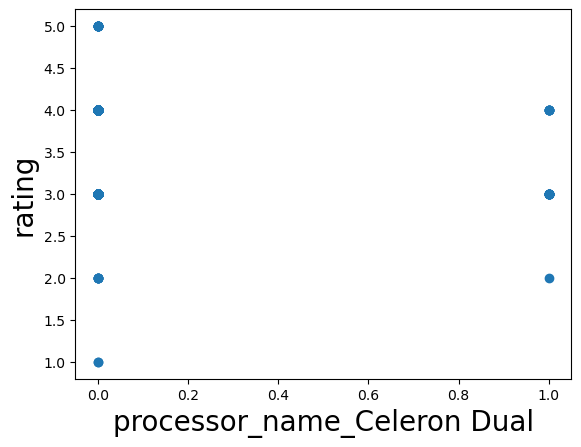

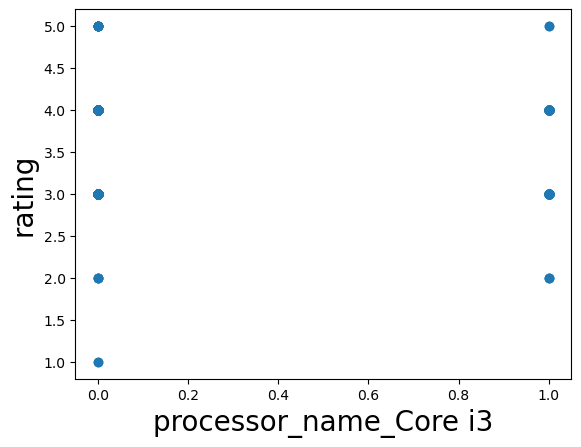

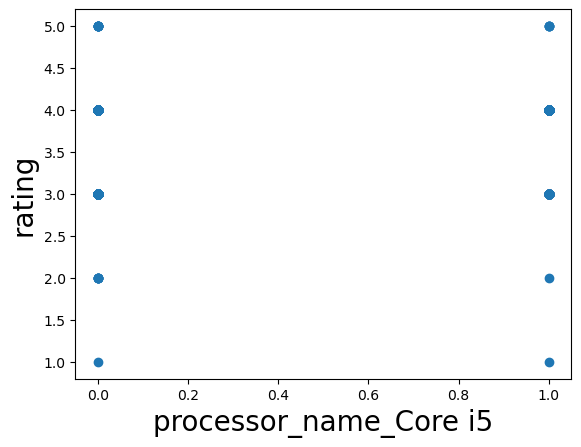

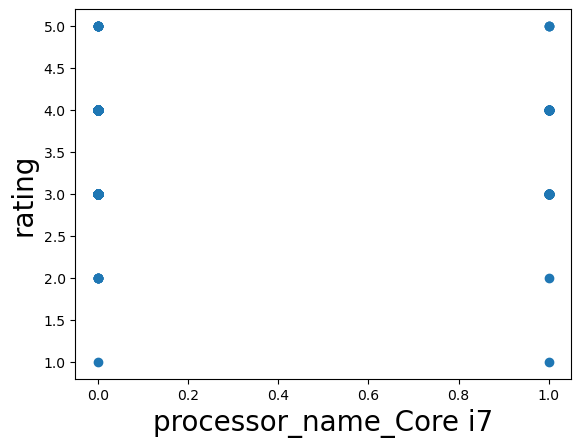

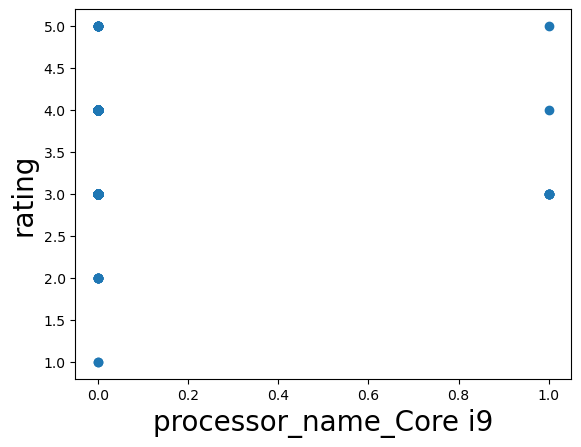

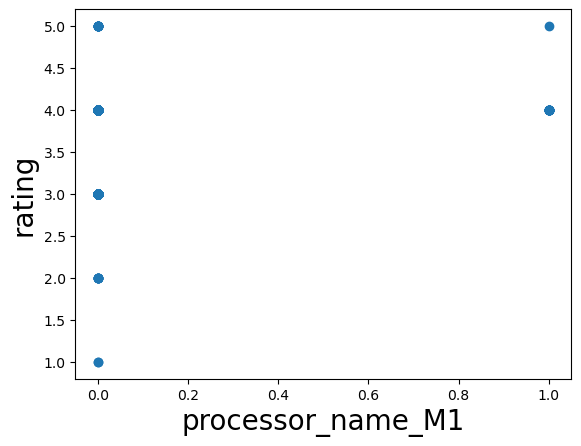

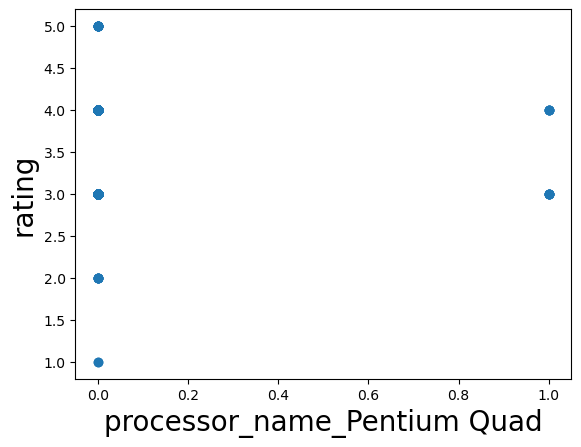

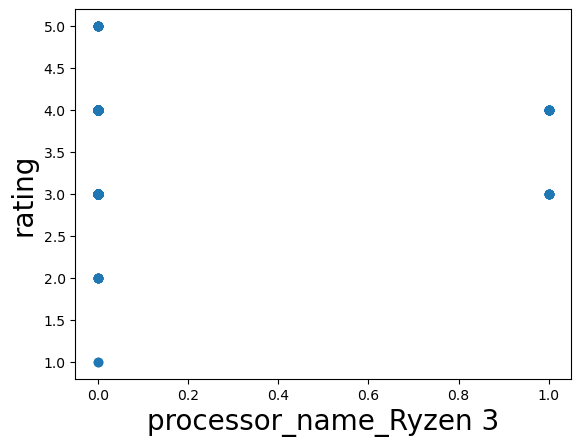

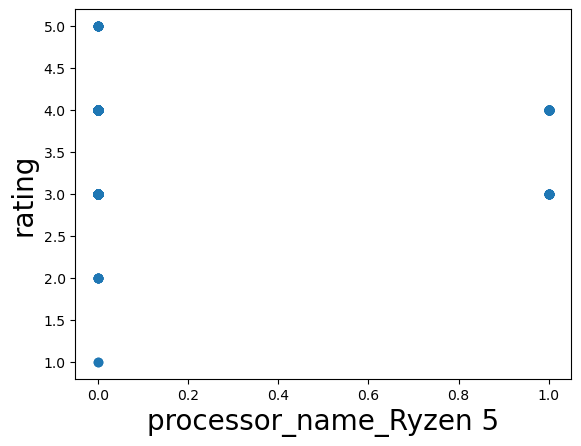

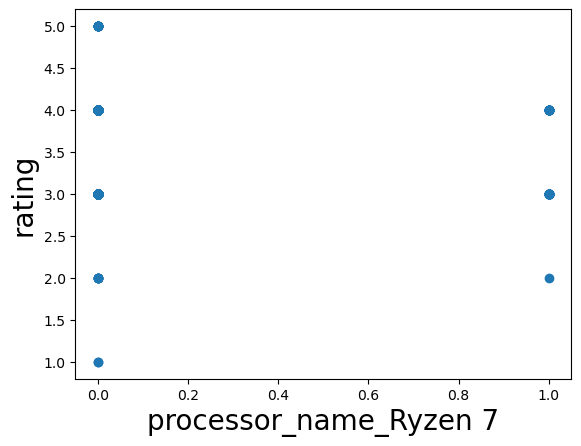

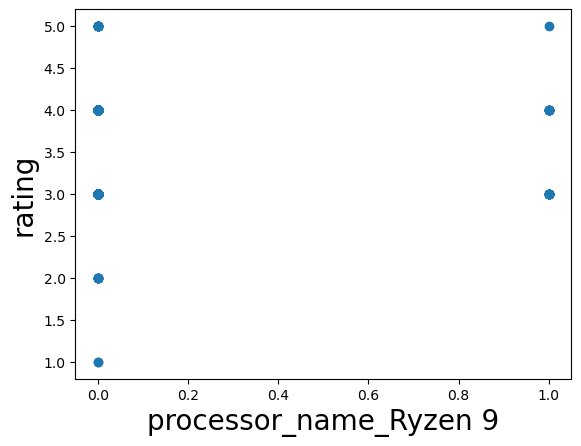

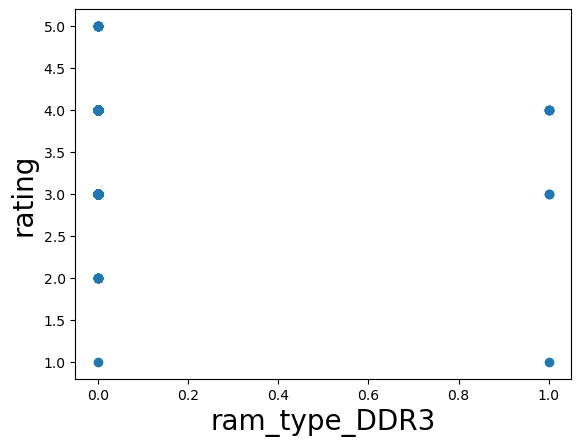

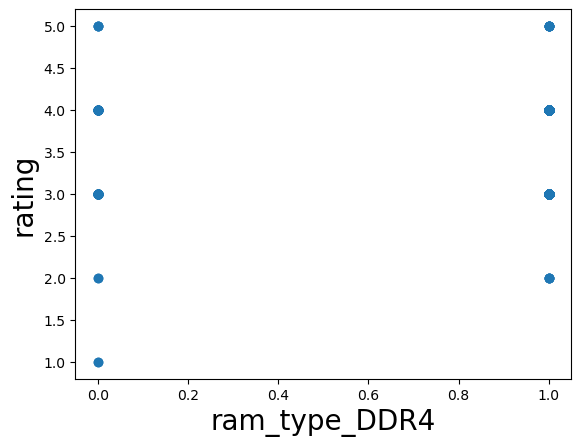

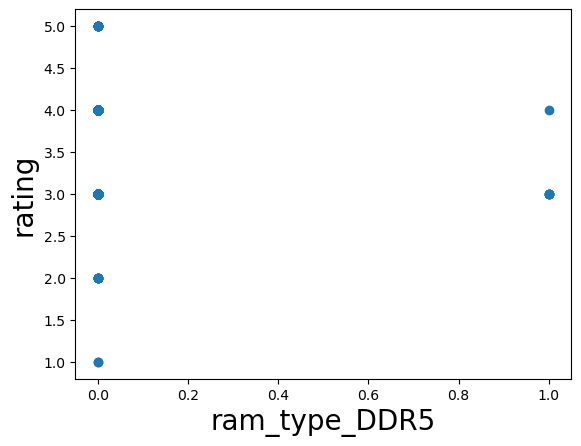

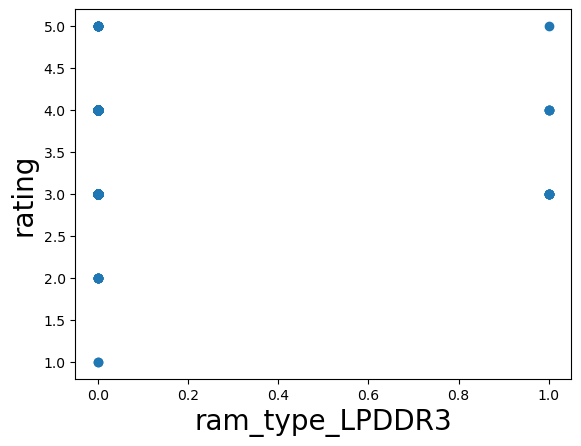

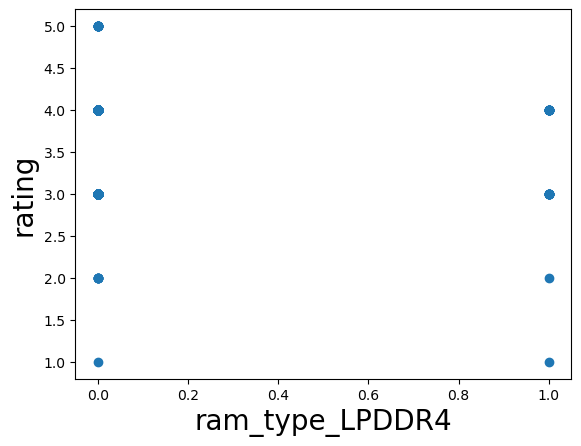

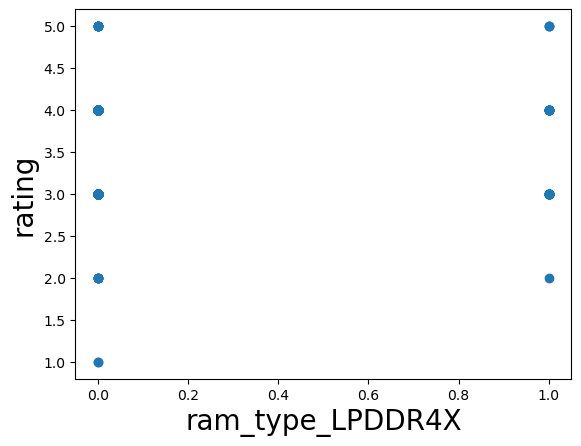

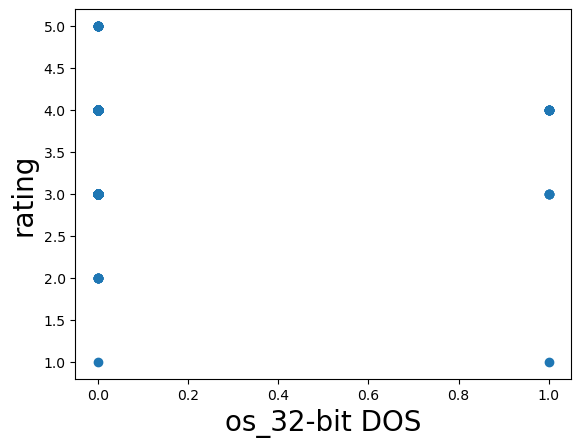

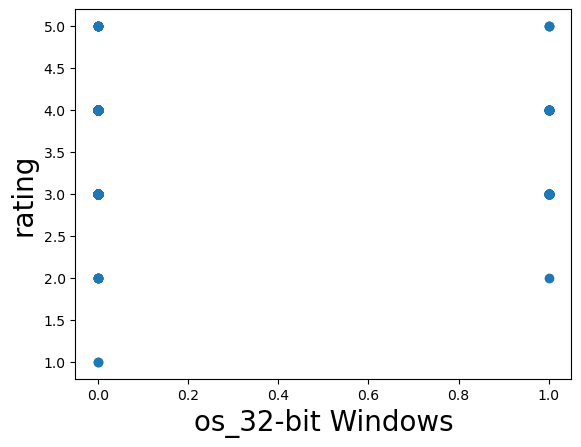

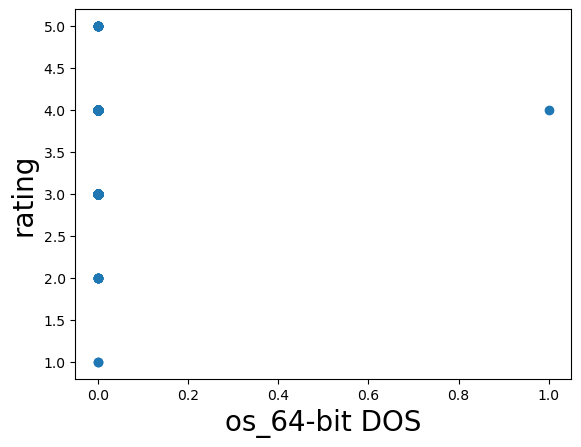

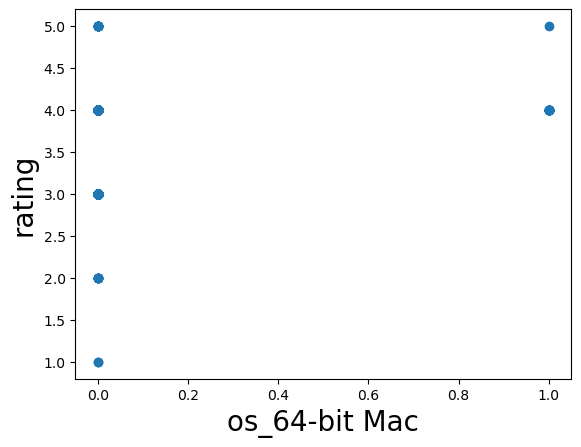

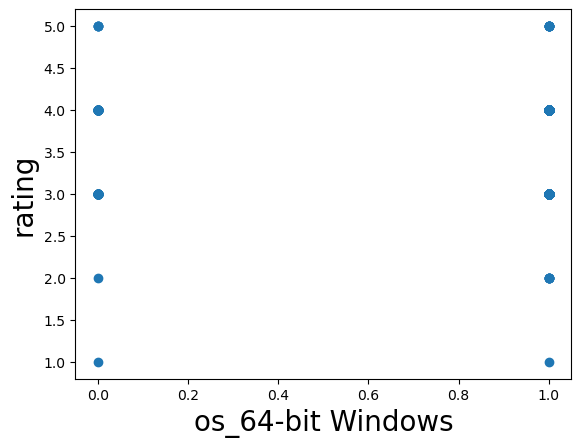

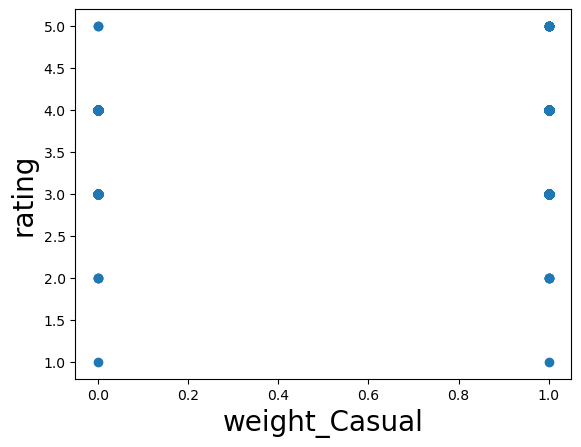

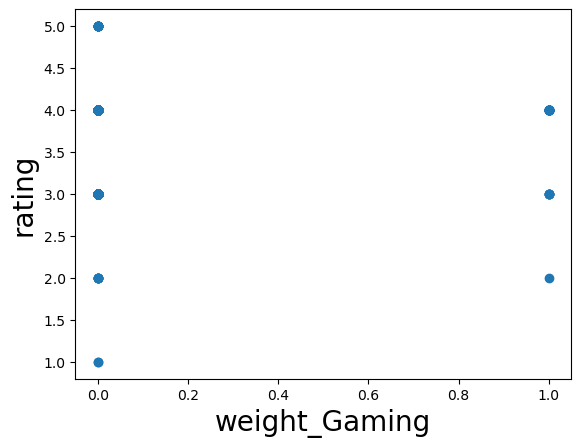

In [318]:
features=len(data_encoded.columns)-1
for i in range(features):
    plt.scatter(data_encoded[data_encoded.columns[i]],y)
    plt.xlabel(data_encoded.columns[i], fontsize = 20)
    plt.ylabel('rating', fontsize = 20)
    plt.show()

### corr

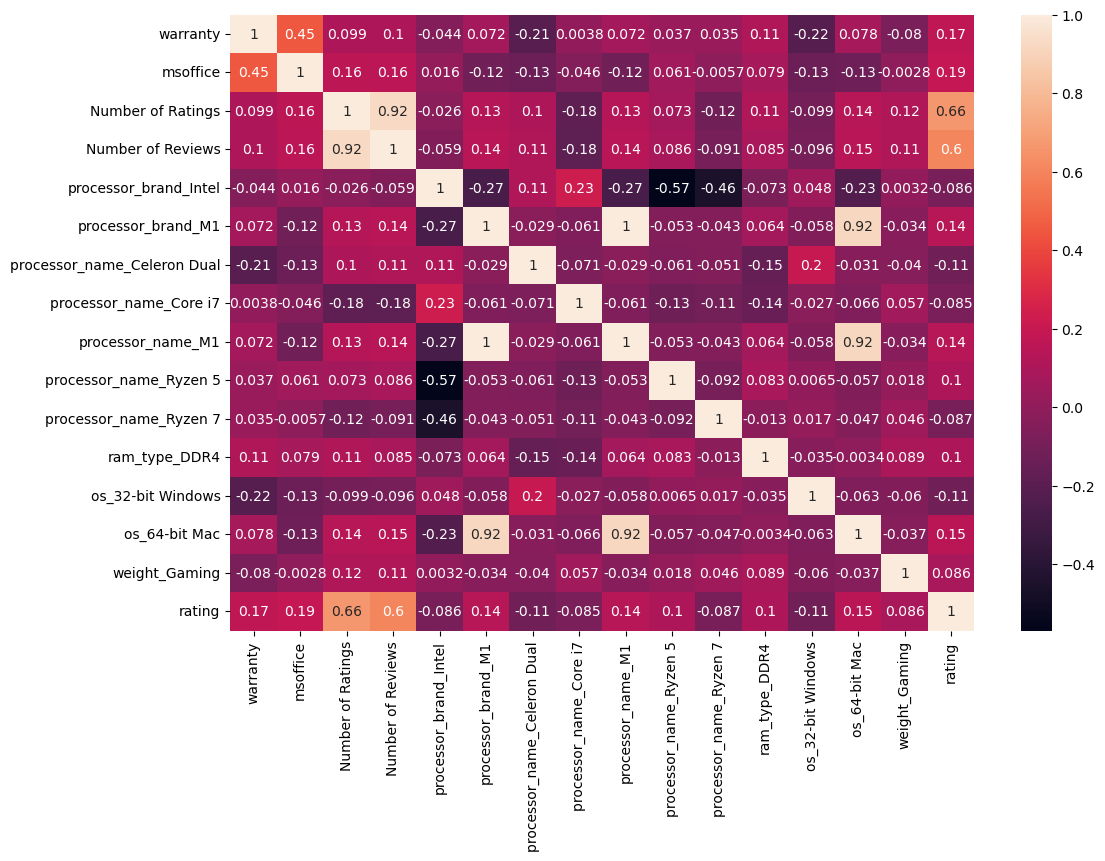

In [319]:
all_data=data_encoded.iloc[:,:]
y.to_frame()
all_data=pd.concat([all_data,y],axis=1)
corr=all_data.corr()
top_feature = corr.index[abs(corr['rating'])>0.08]
plt.subplots(figsize=(12, 8))
top_corr = all_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [320]:
top_feature=top_feature.drop('rating')
finshed_data = pd.DataFrame(data_encoded)
finshed_data=finshed_data[top_feature]
finshed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 722
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   warranty                     706 non-null    int32  
 1   msoffice                     706 non-null    int32  
 2   Number of Ratings            706 non-null    float64
 3   Number of Reviews            706 non-null    float64
 4   processor_brand_Intel        706 non-null    int32  
 5   processor_brand_M1           706 non-null    int32  
 6   processor_name_Celeron Dual  706 non-null    int32  
 7   processor_name_Core i7       706 non-null    int32  
 8   processor_name_M1            706 non-null    int32  
 9   processor_name_Ryzen 5       706 non-null    int32  
 10  processor_name_Ryzen 7       706 non-null    int32  
 11  ram_type_DDR4                706 non-null    int32  
 12  os_32-bit Windows            706 non-null    int32  
 13  os_64-bit Mac       

In [321]:
X =finshed_data

### visualize top features

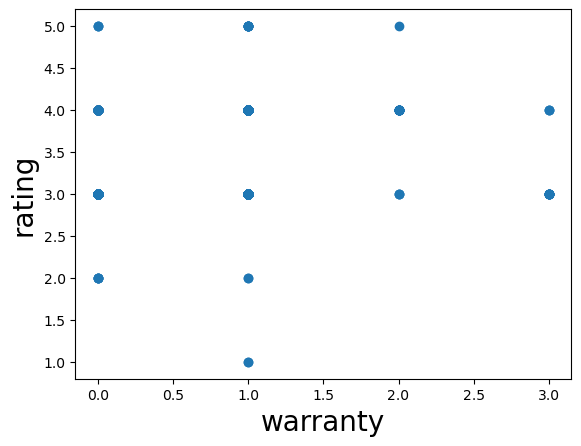

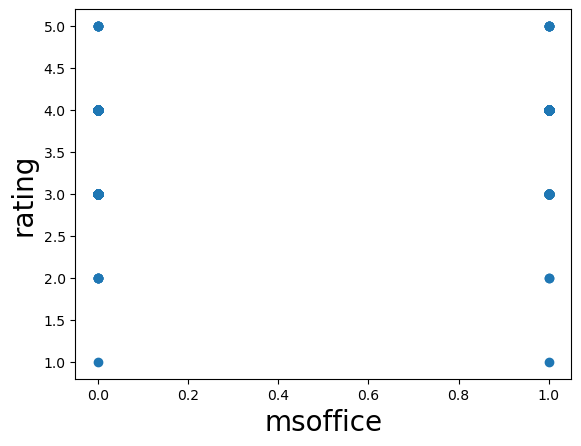

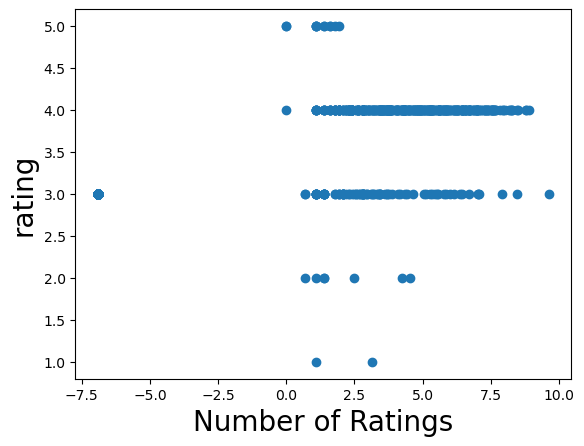

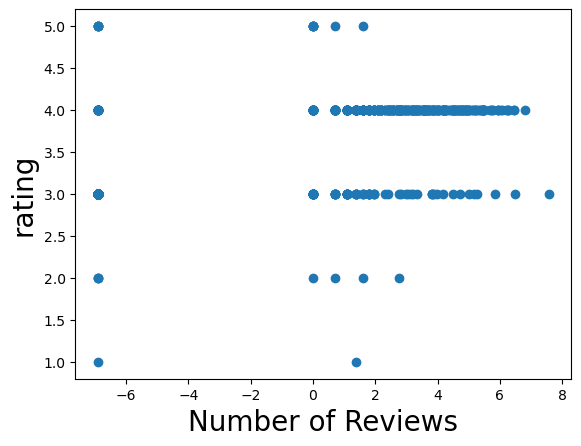

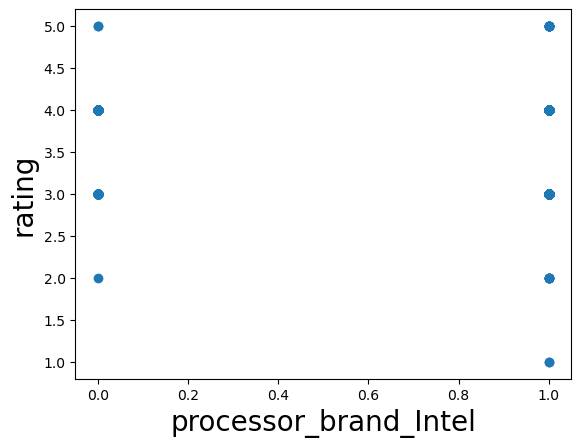

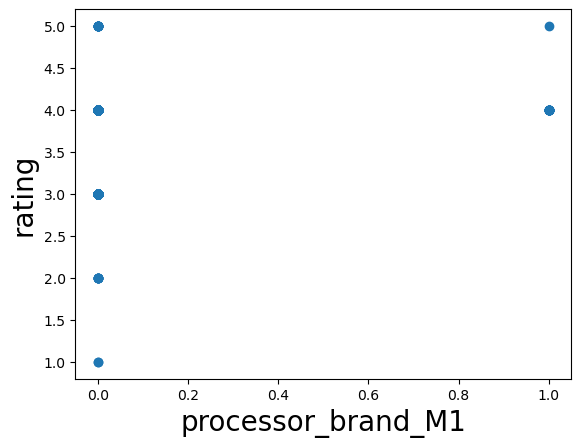

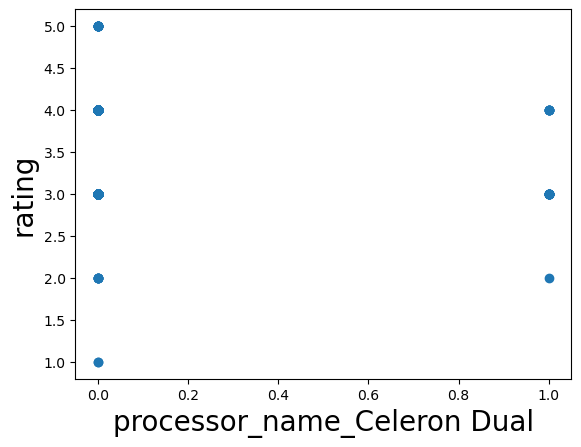

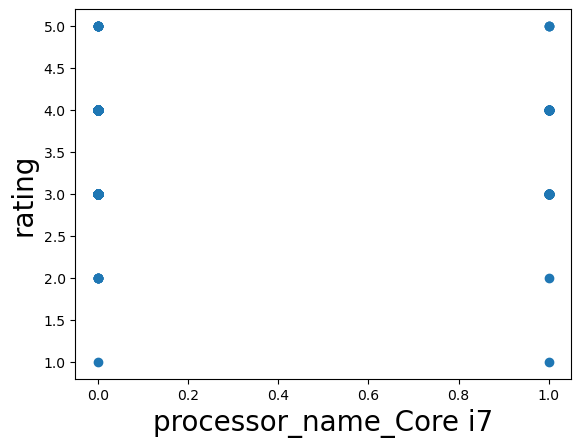

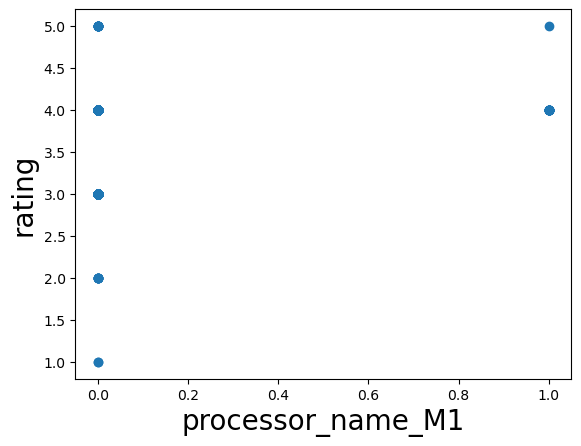

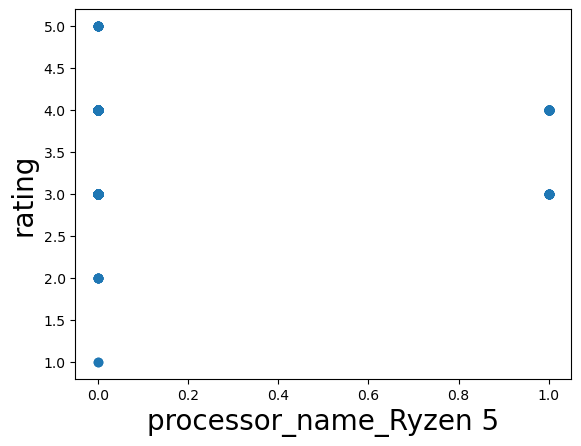

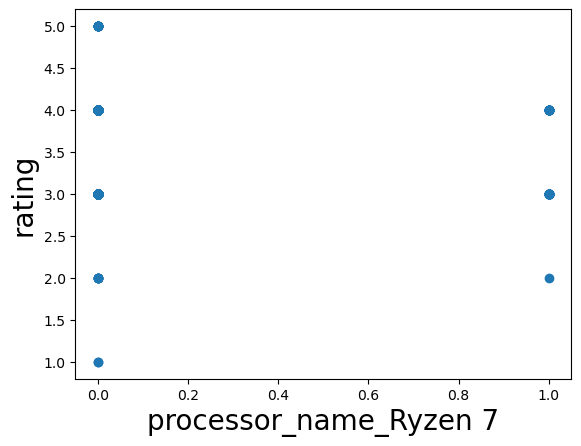

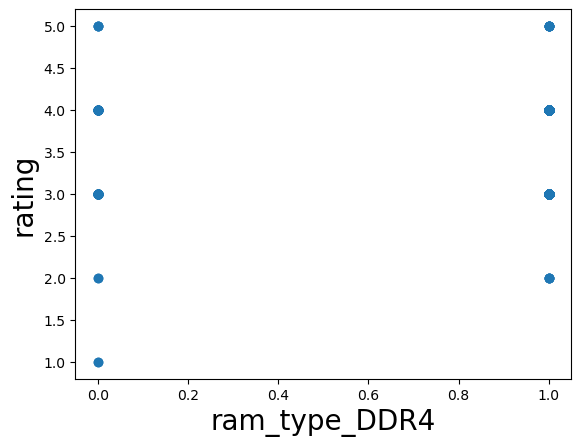

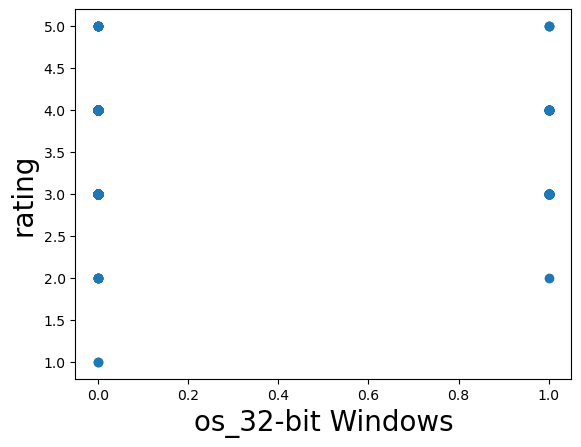

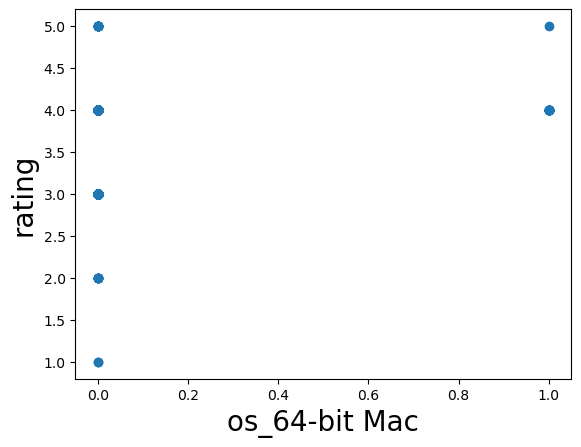

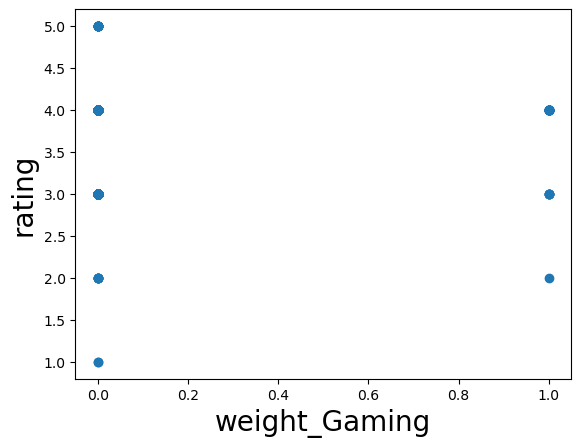

In [322]:
features=len(finshed_data.columns)
for i in range(features):
    plt.scatter(finshed_data[finshed_data.columns[i]],y)
    plt.xlabel(finshed_data.columns[i], fontsize = 20)
    plt.ylabel('rating', fontsize = 20)
    plt.show()

## regression model

In [323]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("train MSE:", train_mse)

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Testing MSE:", test_mse)


r2 = r2_score(y_test, y_test_pred)
print("R-squared Score for Linear Regression:", r2)

train MSE: 0.1861773321549483
Testing MSE: 0.11576005863070693
R-squared Score for Linear Regression: 0.5461688699320926


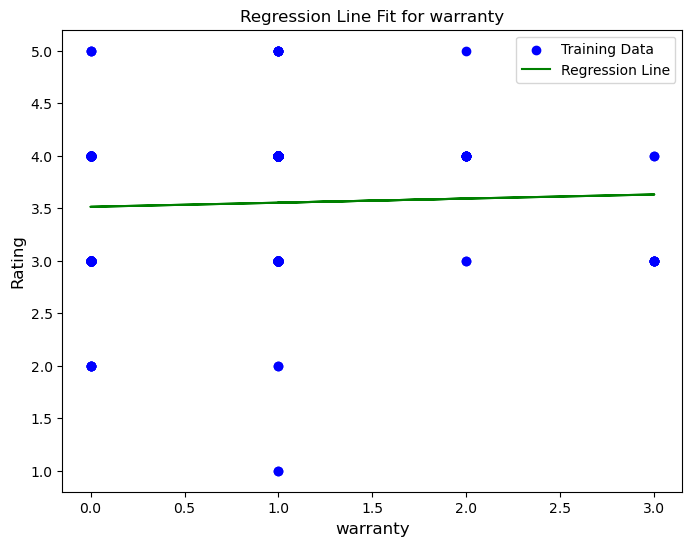

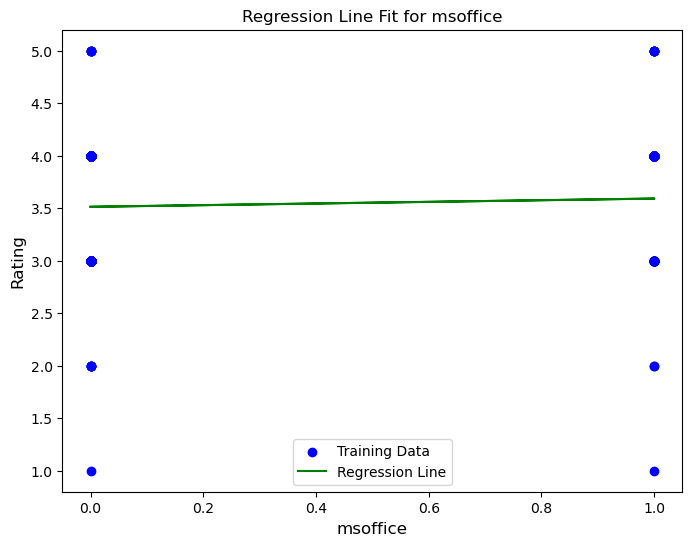

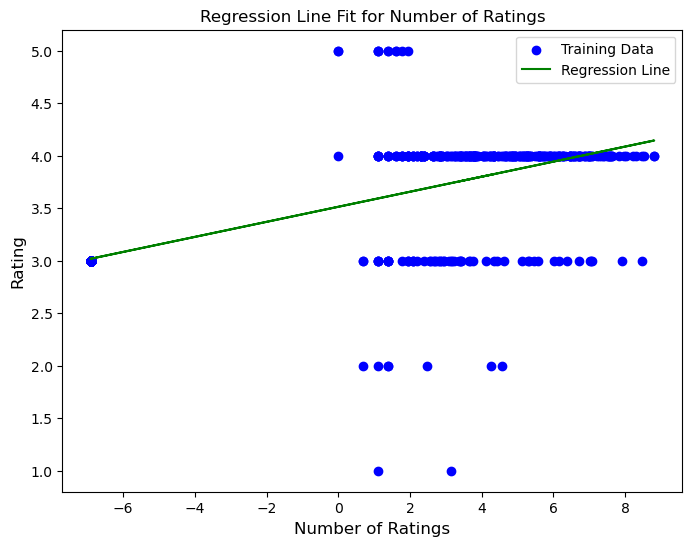

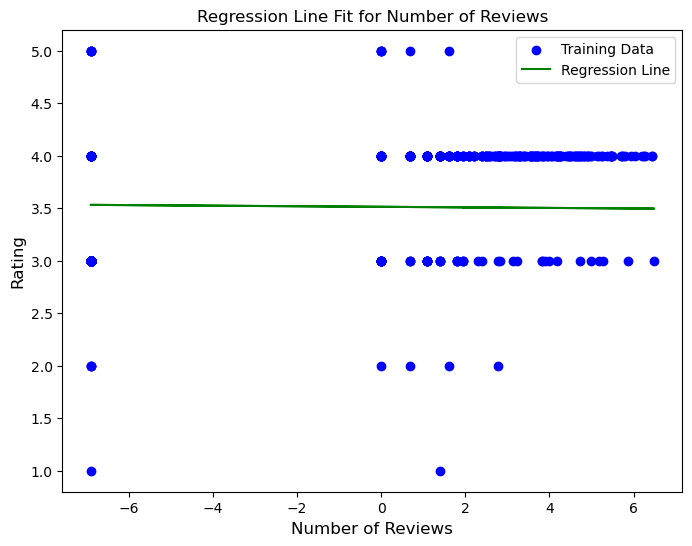

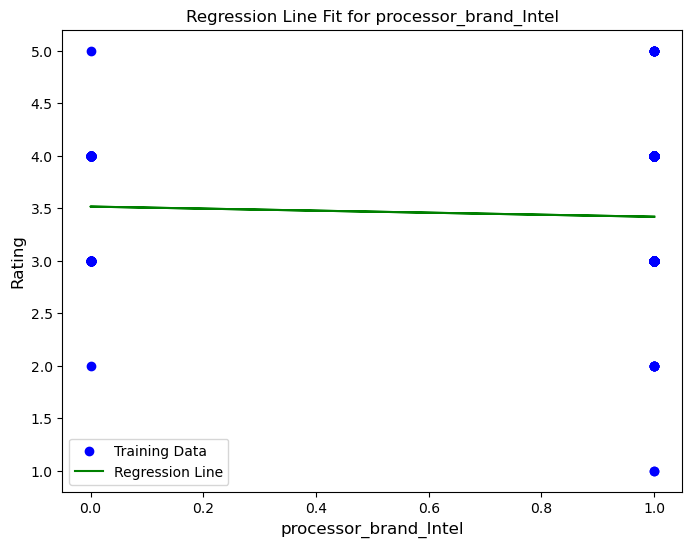

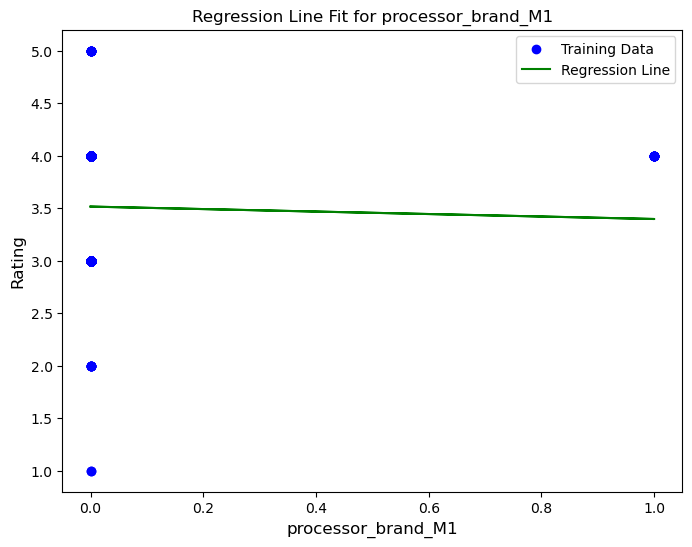

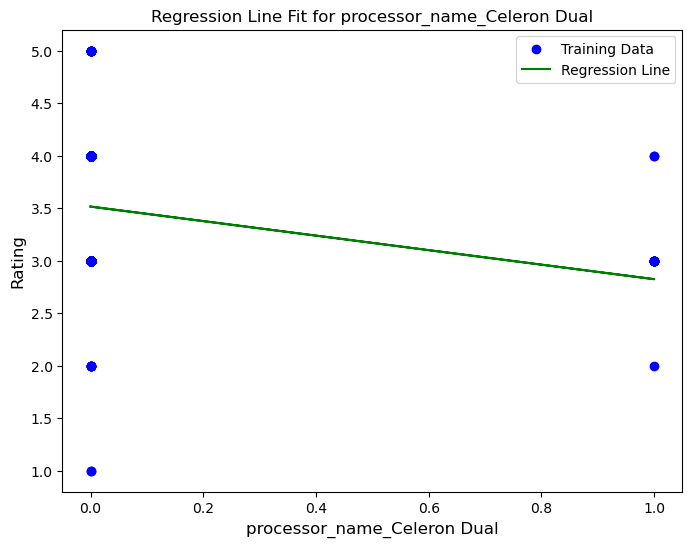

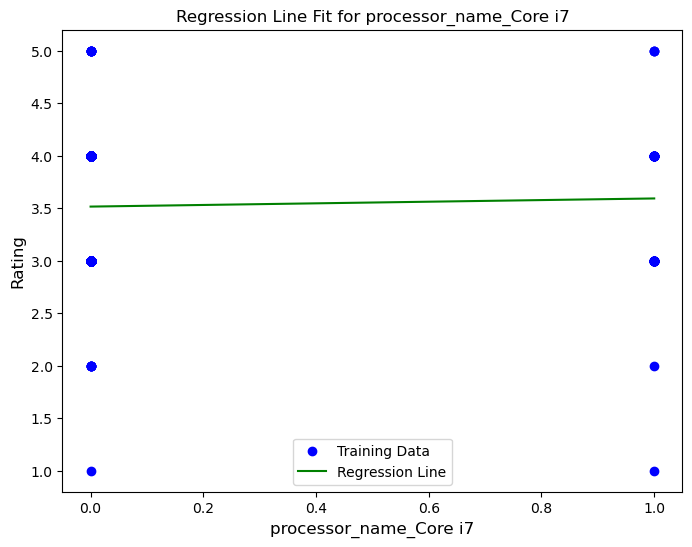

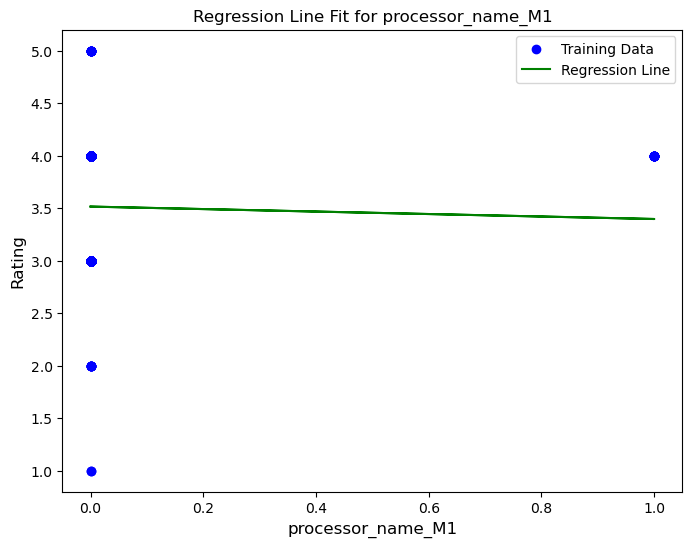

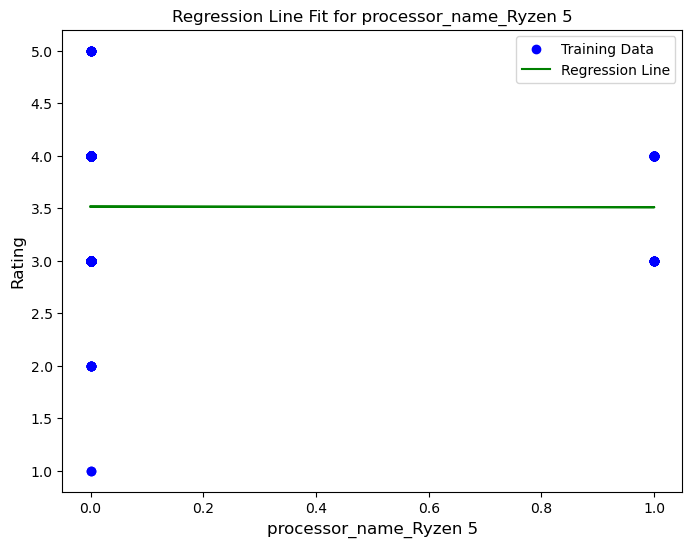

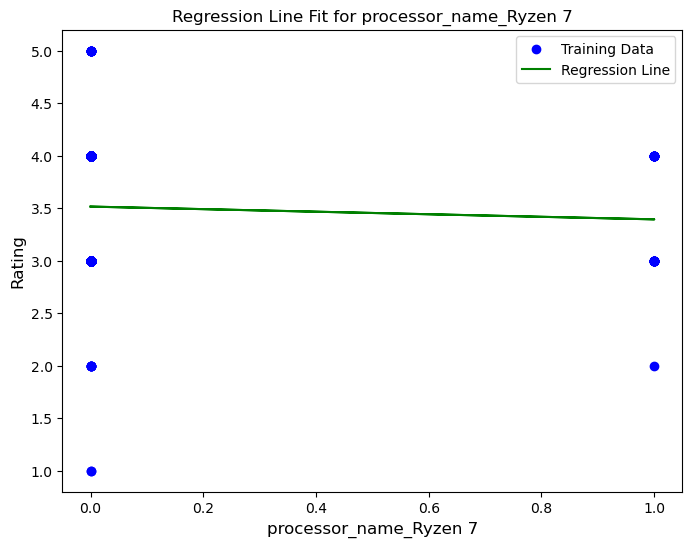

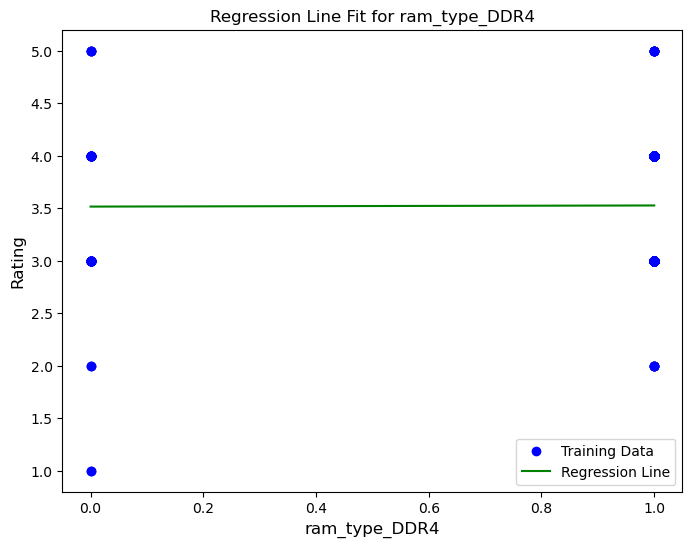

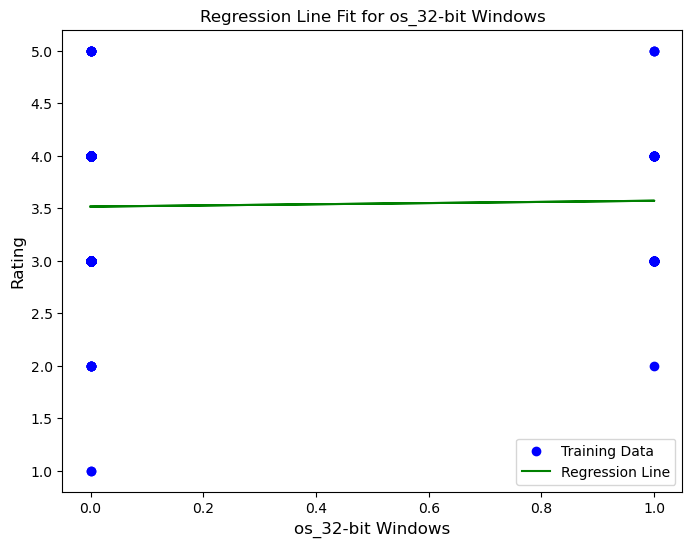

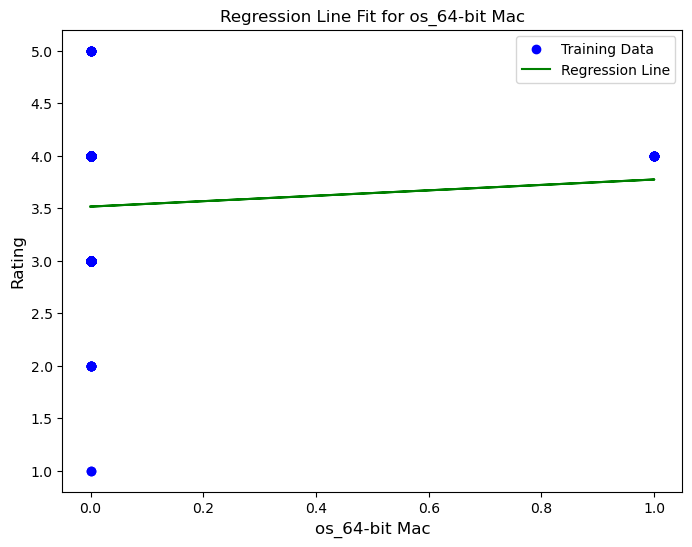

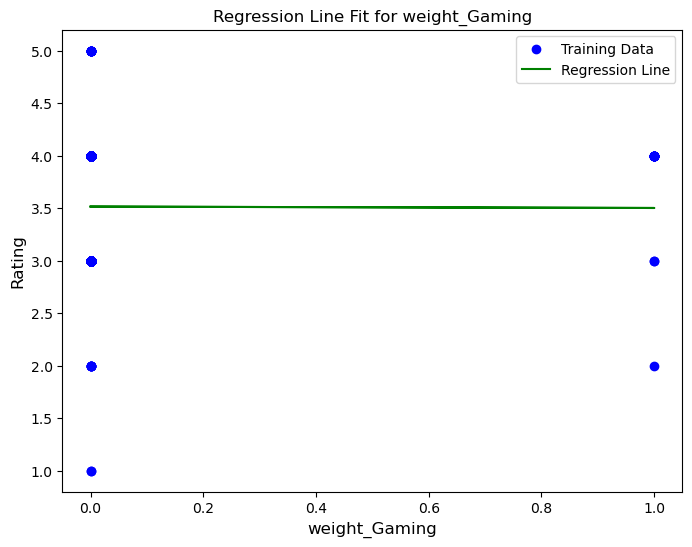

In [324]:
coefficients = model.coef_
intercept = model.intercept_

for i, feature in enumerate(X.columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[feature], y_train, color='blue', label='Training Data')    
    plt.plot(X_train[feature], coefficients[i] * X_train[feature] + intercept, color='green', label='Regression Line')
    
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Rating', fontsize=12)
    plt.title('Regression Line Fit for ' + feature)
    plt.legend()    
    plt.show()

In [325]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)



y_train_pred = model.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("train MSE:", train_mse)


y_test_pred = model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Testing MSE:", test_mse)


r2 = r2_score(y_test, y_test_pred)
print("R-squared Score for Linear Regression:", r2)

train MSE: 0.16007754124511903
Testing MSE: 0.13561087146844658
R-squared Score for Linear Regression: 0.4683448179276115


In [326]:
rf_regressor = RandomForestRegressor(n_estimators=2, random_state=42)

rf_regressor.fit(X_train, y_train)


y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("train MSE:", train_mse)

y_test_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Testing MSE:", test_mse)


r2 = r2_score(y_test, y_test_pred)
print("R-squared Score for Linear Regression:", r2)

train MSE: 0.11097053531264058
Testing MSE: 0.19798218029350104
R-squared Score for Linear Regression: 0.22382143134062216


In [327]:
svr_regressor = SVR(kernel='rbf')  
svr_regressor.fit(X_train, y_train)

y_train_pred = svr_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:", train_mse)

y_test_pred = svr_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Testing MSE:", test_mse)

r2 = r2_score(y_test, y_test_pred)
print("R-squared Score for SVR:", r2)

Train MSE: 0.20290367375071472
Testing MSE: 0.11832789890560678
R-squared Score for SVR: 0.5361017892172375


In [328]:
gb_regressor = GradientBoostingRegressor(n_estimators=100,learning_rate=0.02, max_depth=3, random_state=42)

gb_regressor.fit(X_train, y_train)

y_train_pred = gb_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:", train_mse)

y_test_pred = gb_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Testing MSE:", test_mse)

r2 = r2_score(y_test, y_test_pred)
print("R-squared Score for Gradient Boosting Regression:", r2)

Train MSE: 0.15511365423958126
Testing MSE: 0.11139215918668166
R-squared Score for Gradient Boosting Regression: 0.5632929865242308


# Saving 

In [329]:
with open('regressionLabelEncoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [330]:
with open('linearRegression.pkl', 'wb') as f:
    pickle.dump(model, f)

In [331]:
with open('regressoin_selected_features.pkl', 'wb') as f:
    pickle.dump(top_feature, f)

In [332]:
with open('labelClasess.pkl', 'wb') as f:
    pickle.dump(classes , f)